In [1]:
from Particle import Particle
from Trimer import Trimer
from Edge import Edge
from Vertex import Vertex
from Top import Top
from Writer import Writer
from TrimerGenerator import TrimerGenerator
from TrimerTemplate import TrimerTemplate
import random
import numpy as np
%matplotlib inline
import pandas as pd

D:\Nextcloud\Python\TrimerSSA\transformations.py:1911: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


In [13]:
reference_edge_length = 84 # used to scale cutoffs

type7 = TrimerTemplate(angle=1*np.pi,stem_length=77,template_type=7,weight=1) # 180 degrees, flat hexamer


type1 = TrimerTemplate(angle=2.984513,stem_length=71,template_type=1,weight=1) # 171 degrees
type2 = TrimerTemplate(angle=2.600541,stem_length=77,template_type=2,weight=1) # 148 degrees
type3 = TrimerTemplate(angle=2.600541,stem_length=77,template_type=3,weight=1) # 148 degrees
type5 = TrimerTemplate(angle=2.583087,stem_length=77,template_type=5,weight=1) # 149 degrees
type6 = TrimerTemplate(angle=2.583087,stem_length=77,template_type=6,weight=1) # 149 degrees
type4 = TrimerTemplate(angle=2.984513,stem_length=79,template_type=4,weight=1) # 171 degrees

#trimer_generator = TrimerGenerator([type1,type1,type1,type2,type2,type2,type3,type3,type3]) # T=3
trimer_generator = TrimerGenerator([type1,type1,type5,type5,type6,type6,type4,type4,type4]) # T=4


def seed_T3():
    seed_vertex1 = Vertex(np.array([198.829, 170.530, 360.401]))
    seed_vertex2 = Vertex(np.array([161.790, 244.135, 376.374]))
    seed_vertex3 = Vertex(np.array([124.752, 199.392, 315.765]))



    seed_edge1 = Edge([seed_vertex1,seed_vertex2])
    seed_edge2 = Edge([seed_vertex2,seed_vertex3])
    seed_edge3 = Edge([seed_vertex3,seed_vertex1])
    seed_trimer = Trimer([seed_edge1,seed_edge2,seed_edge3])
    seed_center = np.array([231.149 , 245.5, 262.1035])
    particle = Particle(seed_trimer,reference_edge_length=reference_edge_length,trimer_generator=trimer_generator)
    particle.centroid = seed_center
    return particle

def seed_T4():
    seed_vertex1 = Vertex(np.array([363.400, 289.674, 316.566]))
    seed_vertex2 = Vertex(np.array([289.698, 317.831, 362.101]))
    seed_vertex3 = Vertex(np.array([317.868, 363.369, 288.384]))



    seed_edge1 = Edge([seed_vertex1,seed_vertex2])
    seed_edge2 = Edge([seed_vertex2,seed_vertex3])
    seed_edge3 = Edge([seed_vertex3,seed_vertex1])
    seed_trimer = Trimer([seed_edge1,seed_edge2,seed_edge3])
    seed_center = np.array([231.149 , 245.5, 262.1035])
    particle = Particle(seed_trimer,reference_edge_length=reference_edge_length,trimer_generator=trimer_generator)
    particle.centroid = seed_center
    return particle


#particle = seed_T3()
particle = seed_T4()

################################################ simulation
prob_on = 1000
on_off_ratio_remove_single = 1 / 0.7
on_off_ratio_remove_double = 1 / 0.007
prob_off_single = prob_on * (1 / on_off_ratio_remove_single)
prob_off_double = prob_on * (1 / on_off_ratio_remove_double)

print("Prob on:",prob_on)
print("Prob of single bonded trimer removal:",prob_off_single)
print("Prob of double bonded trimer removal:",prob_off_double)


# # random add
def simulate(steps):
    rands_on = np.random.random_integers(0,1000,steps)
    rands_off = np.random.random_integers(0,1000,steps)

    complete_flag = False
    for i,rand_on in enumerate(rands_on):

        if particle.complete is False:

            if (rand_on <= prob_on):
                particle.add()

            if (rands_off[i] <= prob_off_single) and (len(particle.open_trimers)>2):
                if len(particle.single_bond_trimers)>0:
                    removing_trimer= random.choice(particle.single_bond_trimers)
                    particle.remove(removing_trimer)

            if (rands_off[i] <= prob_off_double)and (len(particle.open_trimers)>2):
                if len(particle.double_bond_trimers)>0:
                    removing_trimer = random.choice(particle.double_bond_trimers)
                    particle.remove(removing_trimer)

            particle.increment_timestep()
        elif complete_flag is False:
            complete_flag = True
            print("Complete particle")
        else:
            pass



Prob on: 1000
Prob of single bonded trimer removal: 700.0
Prob of double bonded trimer removal: 7.0


In [14]:
simulate(5000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead


In [24]:
particle.summarize()
name = "output/particle.pdb"
writer = Writer(name)
writer.write_particle(particle)

Particle Summary:
	Timesteps:  5001
	Add events:  5001
	Remove events: 3502
	Trimers:  29
	Edges:  57
	Verteces:  29
	Debug Verteces:  14
	Open trimers:  19
	Open edges:  27
	Rejections:  1458


In [20]:
particle.debug_verteces = set()

In [21]:
adding_trimer= random.choice(particle.open_trimers)


In [22]:
exclude_trimers = set()


exclude_trimers.add(adding_trimer)

# collect all secondary trimers
for secondary1 in adding_trimer.secondary_trimers:
    for secondary2 in secondary1.secondary_trimers:
        for secondary3 in secondary2.secondary_trimers:
            for secondary4 in secondary3.secondary_trimers:
                for secondary5 in secondary4.secondary_trimers:
                    exclude_trimers.add(secondary5)
                exclude_trimers.add(secondary4)
            exclude_trimers.add(secondary3)
        exclude_trimers.add(secondary2)
    exclude_trimers.add(secondary1)



In [23]:
for trimer in exclude_trimers:
    dbg = Vertex(trimer.coord)
    particle.debug_verteces.add(dbg)

for top in adding_trimer.tops:
    dbg = Vertex(top.coord)
    particle.debug_verteces.add(dbg)

In [5]:
s = pd.Series(particle.history,index=range(0,len(particle.history)))

Text(0,0.5,'Trimers in particle')

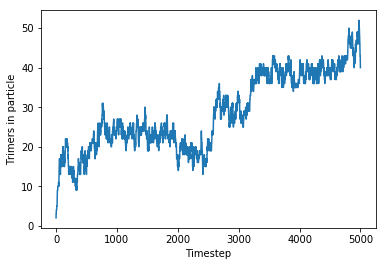

In [6]:
ax = s.plot()
ax.set_xlabel("Timestep")
ax.set_ylabel("Trimers in particle")
